In [1]:
import pandas as pd
import numpy as np
import re
from pprint import pprint

#Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models.coherencemodel import CoherenceModel
from gensim import corpora, models, similarities

#spacy for lemmatization
import spacy
import en_core_web_sm
spacy.load('en_core_web_sm')

#plotting tools
import pyLDAvis
import pyLDAvis.gensim
import matplotlib.pyplot as plt
%matplotlib inline

#Enable logging for gensim
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

import warnings
warnings.filterwarnings('ignore',category= DeprecationWarning)

/usr/lib/python3/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable


In [19]:
#iniializing stop words
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

In [15]:
df = pd.read_json('TopicModelingTexts.json')
df.head()

,Author,Title,Book
0,William Carey,An Enquiry Into The Obligations Of Christians,\r\n\r\n\r\n\r\n\r\n A...
1,Anthony N. Groves,Journal of a Residence at Bagdad,"JOURNAL\r\nOF A\r\nRESIDENCE AT BAGDAD, \r\nDU..."
2,James D. Knowles,Memoir of Mrs. Ann H. Judson,\r\nSdR \r\n\r\n\r\n\r\nm \r\n\r\n\r\n\r\n\r\n...
3,George Müller,A Narrative of Some of the Lord's Dealings Wi...,The Project Gutenberg EBook of A Narrative of ...
4,George Müller,A Narrative of Some of the Lord's Dealings Wi...,The Project Gutenberg EBook of A Narrative of ...


In [16]:
#cleaning
#convert to list
data = df['Book'].values.tolist()
data[:1]

['\r\n\r\n\r\n\r\n\r\n                         AN ENQUIRY INTO THE\r\n\r\n                      OBLIGATIONS OF CHRISTIANS,\r\n\r\n                         TO USE MEANS FOR THE\r\n\r\n                     CONVERSION OF THE HEATHENS.\r\n\r\n\r\n\r\n            IN WHICH THE RELIGIOUS STATE OF THE DIFFERENT\r\n             NATIONS OF THE WORLD, THE SUCCESS OF FORMER\r\n               UNDERTAKINGS, AND THE PRACTICABILITY OF\r\n                FURTHER UNDERTAKINGS, ARE CONSIDERED,\r\n\r\n\r\n\r\n                          BY WILLIAM CAREY.\r\n\r\n\r\n\r\n      For there is no Difference between the Jew and the Greek;\r\n   for the same Lord over all, is rich unto all that call upon him.\r\n   For whosoever shall call on the name of the Lord shall be saved.\r\n        How then shall they call on him, in whom they have not\r\n       believed? and how shall they believe in him of whom they\r\n     have not heard? and how shall they hear without a Preacher?\r\n            and how shall they preac

In [17]:
data_book = [re.sub('\s+', ' ', sent) for sent in data]
data_book = [re.sub("\'", " ", sent) for sent in data]
data_book = [re.sub('\[.*?\]', ' ', sent) for sent in data]
data_book = [re.sub('\w*\d\w*', ' ', sent) for sent in data]
data_book = [re.sub('[''""...]', ' ', sent) for sent in data]
data_book = [re.sub('\n', ' ', sent) for sent in data]
data_book = [re.sub('\\r*\\n*\\\\*', '', sent) for sent in data]
data_book[:1]

['                         AN ENQUIRY INTO THE                      OBLIGATIONS OF CHRISTIANS,                         TO USE MEANS FOR THE                     CONVERSION OF THE HEATHENS.            IN WHICH THE RELIGIOUS STATE OF THE DIFFERENT             NATIONS OF THE WORLD, THE SUCCESS OF FORMER               UNDERTAKINGS, AND THE PRACTICABILITY OF                FURTHER UNDERTAKINGS, ARE CONSIDERED,                          BY WILLIAM CAREY.      For there is no Difference between the Jew and the Greek;   for the same Lord over all, is rich unto all that call upon him.   For whosoever shall call on the name of the Lord shall be saved.        How then shall they call on him, in whom they have not       believed? and how shall they believe in him of whom they     have not heard? and how shall they hear without a Preacher?            and how shall they preach except they be sent?                                                              PAUL.                              MDCCXCII.

In [18]:
#Word Tokenization
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))

data_words = list(sent_to_words(data))
print(data_words[:1])

[['an', 'enquiry', 'into', 'the', 'obligations', 'of', 'christians', 'to', 'use', 'means', 'for', 'the', 'conversion', 'of', 'the', 'heathens', 'in', 'which', 'the', 'religious', 'state', 'of', 'the', 'different', 'nations', 'of', 'the', 'world', 'the', 'success', 'of', 'former', 'undertakings', 'and', 'the', 'practicability', 'of', 'further', 'undertakings', 'are', 'considered', 'by', 'william', 'carey', 'for', 'there', 'is', 'no', 'difference', 'between', 'the', 'jew', 'and', 'the', 'greek', 'for', 'the', 'same', 'lord', 'over', 'all', 'is', 'rich', 'unto', 'all', 'that', 'call', 'upon', 'him', 'for', 'whosoever', 'shall', 'call', 'on', 'the', 'name', 'of', 'the', 'lord', 'shall', 'be', 'saved', 'how', 'then', 'shall', 'they', 'call', 'on', 'him', 'in', 'whom', 'they', 'have', 'not', 'believed', 'and', 'how', 'shall', 'they', 'believe', 'in', 'him', 'of', 'whom', 'they', 'have', 'not', 'heard', 'and', 'how', 'shall', 'they', 'hear', 'without', 'preacher', 'and', 'how', 'shall', 'they

In [28]:
#Remove stop words
# corpus = [w for w in data_words.split() if w not in stop_words]

Object `Word2Vec` not found.


In [29]:
#Creating the word2vec model
model = gensim.models.Word2Vec(data_words, min_count=1, workers=4, size=100)

In [33]:
model.most_similar('christ')

[('jesus', 0.8506696820259094),
 ('saviour', 0.8356353044509888),
 ('salvation', 0.8352110385894775),
 ('resurrection', 0.791635274887085),
 ('message', 0.7803024649620056),
 ('sinners', 0.776567816734314),
 ('savior', 0.7755460143089294),
 ('love', 0.7731742858886719),
 ('faithful', 0.7612023949623108),
 ('faith', 0.7569119930267334)]

In [31]:
#fit a 2d PCA model to the vectors
from sklearn.decomposition import PCA

X = model[model.wv.vocab]
pca = PCA(n_components=2)
result = pca.fit_transform(X)

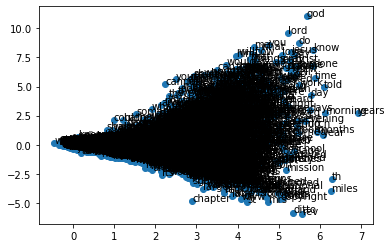

In [32]:
#Create a scatter plot for the projection
plt.scatter(result[:, 0], result[:, 1])
words = list(model.wv.vocab)
for i, word in enumerate(words):
    plt.annotate(word, xy=(result[i, 0], result[i, 1]))
plt.show()